<a href="https://colab.research.google.com/github/divyansh-ag-03/IAIML/blob/main/IAIML_Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis (PCA)

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

Preparing the Iris dataset for PCA by standardizing the features and computing the covariance matrix. The printed covariance matrix gives an insight into the relationships and variances between different features, which is a crucial step in understanding the data's structure before applying PCA.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 1: Standardize the Data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(X_std, rowvar=False)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Computing and printing the eigenvalues and eigenvectors and sorting the eigenvectors based on the eigenvalues. Sorting helps in identifying the principal components that capture the most variance in the data, allowing for a more effective dimensionality reduction with PCA.

In [29]:
# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print Eigenvalues and Eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 4: Sort Eigenvectors by Eigenvalues
eigenvectors = eigenvectors[:, np.argsort(-eigenvalues)]
eigenvalues = eigenvalues[np.argsort(-eigenvalues)]

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Setting the number of desired principal components, initializes a PCA object, and selects the corresponding top eigenvectors. The selected PCA components are then printed for reference, providing insight into the directions in the original feature space that contribute the most to the variance in the data.

In [30]:
# Step 5: Select Principal Components
num_components = 2  # Choose the number of components
pca = PCA(n_components=num_components)
top_eigenvectors = eigenvectors[:, :num_components]

# Print PCA Components
print("\nPCA Components (Top 2):\n", top_eigenvectors)


PCA Components (Top 2):
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


Selecting principal components to transform the original standardized data into a lower-dimensional space. Showing the first 5 samples of the reduced data, providing a glimpse into how the dimensionality reduction has affected the representation of the original dataset.

In [31]:
# Step 6: Transform Original Data
X_pca = np.dot(X_std, top_eigenvectors)

# Display the transformed data
print("\nReduced Data (First 5 samples):\n", X_pca[:5, :])


Reduced Data (First 5 samples):
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


Visually representing the Iris dataset in a reduced two-dimensional space that I obtained through PCA. The scatter plot helps visualize how well the first two principal components capture the variations in the original data and how different classes are distributed in this reduced space.

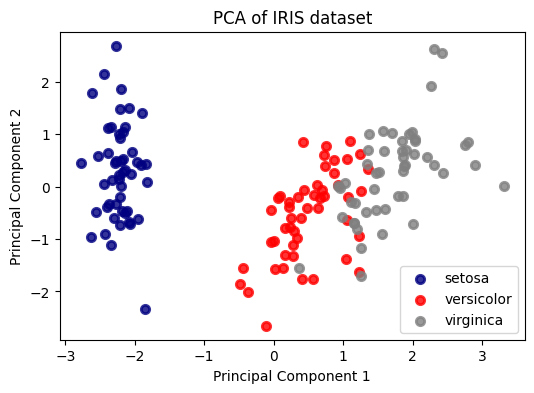

In [32]:
# Fit and transforming data into 1st 2 PC's
X_pca = pca.fit_transform(X_std)

# Scatter plot to visualize reduced data
plt.figure(figsize=(6, 4))
colors = ['navy', 'red', 'grey']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()